In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
 70% 69.0M/98.7M [00:00<00:00, 723MB/s]
100% 98.7M/98.7M [00:00<00:00, 697MB/s]


In [ ]:
# Install unzip utility (if not already installed)
!apt-get install unzip

# Unzip the dataset and overwrite existing files without prompting
!unzip -o /content/melanoma-skin-cancer-dataset-of-10000-images.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: /

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images -p /content/drive/MyDrive/new

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
melanoma-skin-cancer-dataset-of-10000-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
cd /content/drive/MyDrive/new


/content/drive/MyDrive/new


In [ ]:
ls


melanoma_cancer_dataset/                          skin_cancer_cnn.h5
melanoma-skin-cancer-dataset-of-10000-images.zip


In [ ]:
!unzip /content/drive/MyDrive/new/melanoma-skin-cancer-dataset-of-10000-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: melanoma_cancer_dataset/train/benign/melanoma_654.jpg  
  inflating: melanoma_cancer_dataset/train/benign/mel

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
import pathlib

data_dir_train = pathlib.Path("/content/drive/MyDrive/new/melanoma_cancer_dataset/train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/new/melanoma_cancer_dataset/test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

9605
1000


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the datase
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 7684 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 1921 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


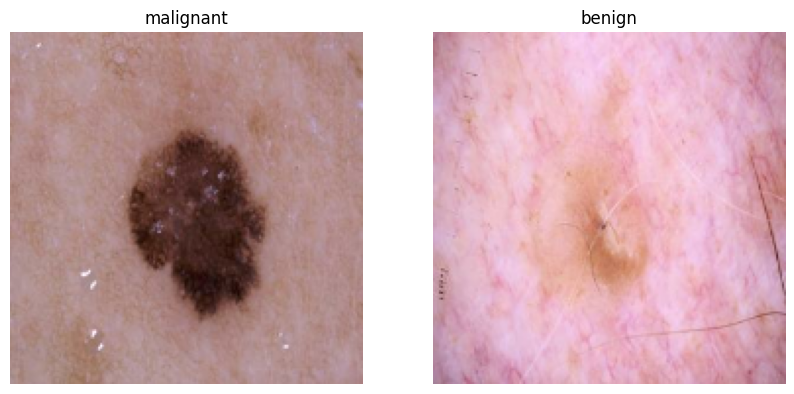

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
!pip install keras
from tensorflow import keras
from tensorflow.keras import layers, models

# ============================
# Data Augmentation
# ============================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Apply augmentation to training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# ============================
# Improved CNN Model
# ============================
num_classes = 2  # Binary classification

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Single output for binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


creat the modal

compile the modal

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,859,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,953,473 (60.86 MB)

 Trainable params: 15,953,473 (60.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Learning Rate Scheduler
# ============================
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

In [ ]:
# Train Model
# ============================
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[lr_scheduler]
)

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 890s 3s/step - accuracy: 0.6756 - loss: 0.6455 - val_accuracy: 0.8407 - val_loss: 0.3771 - learning_rate: 0.0010
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.8519 - loss: 0.3589 - val_accuracy: 0.8751 - val_loss: 0.3083 - learning_rate: 0.0010
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 690s 3s/step - accuracy: 0.8622 - loss: 0.3319 - val_accuracy: 0.8824 - val_loss: 0.2784 - learning_rate: 0.0010
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 688s 3s/step - accuracy: 0.8806 - loss: 0.2920 - val_accuracy: 0.8725 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 687s 3s/step - accuracy: 0.8764 - loss: 0.3025 - val_accuracy: 0.8813 - val_loss: 0.2697 - learning_rate: 0.0010
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 670s 3s/step - accuracy: 0.8767 - loss: 0.2923 - val_accuracy: 0.8829 - val_loss: 0.2660 - learning_rate: 0.0010
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 640s 3s/step - accuracy: 0.8800 - loss: 0.

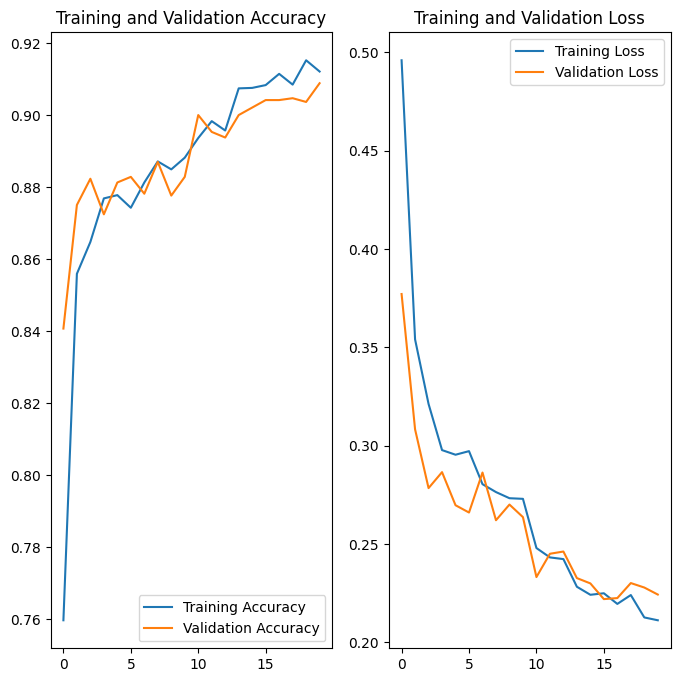

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("Best Training Accuracy: {:.4f}".format(max(history.history['accuracy'])))
print("Best Validation Accuracy: {:.4f}".format(max(history.history['val_accuracy'])))


Best Training Accuracy: 0.9153
Best Validation Accuracy: 0.9089


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

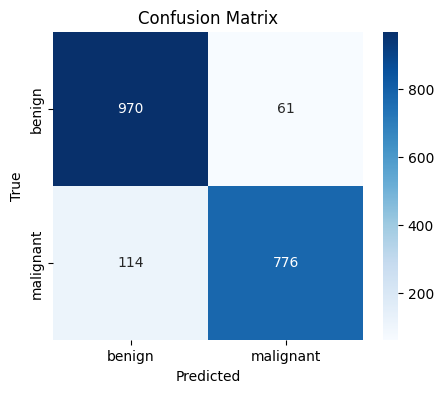

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions on validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32")  # threshold 0.5
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("skin_cancer_cnn.h5")
print("Model saved as skin_cancer_cnn.h5")


Model saved as skin_cancer_cnn.h5


In [ ]:
# TESTING ON THE UNSEEN TEST SET
# =============================================================================

# 1. Create the test dataset (No augmentation, no shuffling!)
print("\nCreating test dataset...")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123, # Using a seed for reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size)


Creating test dataset...
Found 1000 files belonging to 2 classes.


In [ ]:
# Optimize the test dataset for reading
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# 2. Evaluate the model on the test set to get final loss and accuracy
print("\nEvaluating model on test set...")
test_loss, test_accuracy = model.evaluate(test_ds)
print("---------------------------------")
print(f"FINAL TEST ACCURACY: {test_accuracy * 100:.2f}%")
print(f"FINAL TEST LOSS: {test_loss:.4f}")
print("---------------------------------")


Evaluating model on test set...
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 751ms/step - accuracy: 0.9169 - loss: 0.1824
---------------------------------
FINAL TEST ACCURACY: 91.30%
FINAL TEST LOSS: 0.2063
---------------------------------


In [ ]:
# 3. Get predictions for the entire test set to create a confusion matrix
print("\nGenerating predictions for confusion matrix...")
y_true_test = []  # To store true labels
y_pred_test = []  # To store predicted labels (after threshold)

for images, labels in test_ds:
    # Predict the probability of being class 1 (malignant)
    pred_probs = model.predict(images, verbose=0)
    # Apply threshold (0.5) to convert probabilities to binary classes (0 or 1)
    preds = (pred_probs > 0.5).astype("int32")
    y_true_test.extend(labels.numpy())
    y_pred_test.extend(preds.flatten()) # Flatten because preds is a column vector



Generating predictions for confusion matrix...


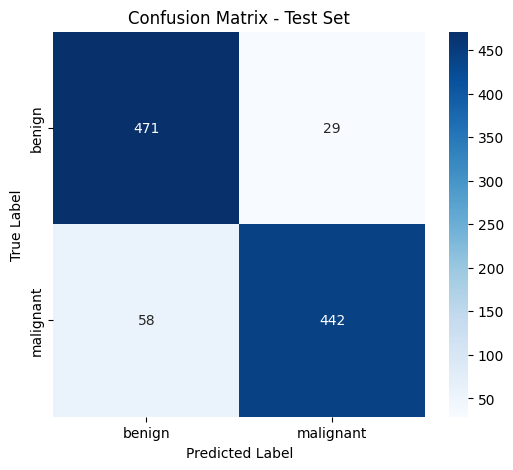

In [ ]:
# 4. Plot a Confusion Matrix for the Test Set
plt.figure(figsize=(6, 5))
cm_test = confusion_matrix(y_true_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()


In [ ]:
# 5.Generate a Detailed Classification Report
from sklearn.metrics import classification_report

print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT (TEST SET)")
print("="*50)
print(classification_report(y_true_test, y_pred_test, target_names=class_names))


DETAILED CLASSIFICATION REPORT (TEST SET)
              precision    recall  f1-score   support

      benign       0.89      0.94      0.92       500
   malignant       0.94      0.88      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

